In [1]:
import networkx as nx
import csv
import operator
import random

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline  

In [20]:
import numpy as np

# Get Data from .csv's

In [3]:
def open_tweets(start, end = False):
    data = []
    if end == False:
        end = start
    for i in range(start, end + 1):
        csv_file = open('all_tweets/IRAhandle_tweets_' + str(i) + '.csv')
        data += list(csv.DictReader(csv_file))
        csv_file.close()
    return data

In [4]:
# data = open_tweets(1)

In [97]:
data = open_tweets(1, 13)

In [98]:
print(len(data))
# print(len(alldata))

2946207


Let's take a look at the domains that these tweets are linking to.
# Get Domain Info & Sort Into All / Russian / Non-Russian
##### Format of each dictionary:

{(string) *domain_name*: (array) [(int) *count*, (array) *tweet_id's* linking to this domain]}

In [7]:
link_categories = ['tco1_step1', 'tco2_step1', 'tco3_step1']
user_info = ['author']
details = ['retweet', 'account_category']

In [8]:
domain_starters = ['http://', 'https://']
common_bits = ['www.', '.com']

# UNUSED AS OF NOW
def get_domain_old(link, no_common = False):
    # removes the http:// and https://, and does not have the ending slash
    longest_starter_len = max([len(i) for i in domain_starters])
    longest_common_len = max([len(i) for i in common_bits])
    for ds in domain_starters:
        if ds in link[:longest_starter_len]:
            beginning = link[len(ds):].split('/')[0]
            if no_common:
                for b in common_bits:
                    if b in beginning:
                        beginning = [r for r in beginning.split(b) if r != ''][0] 
            return beginning.lower()

def get_domain(link, no_common = False):
    longest_common_len = max([len(i) for i in common_bits])
    beginning = '/'.join(link.split('/')[:3]) # we assume we have something like pre://domain_name/...
    if no_common:
        for b in common_bits:
            if b in beginning:
                beginning = [r for r in beginning.split(b) if r != ''][0]
    return beginning.lower() + '/'
        
def basic_dict_checks(dct, key, twt_id):
    if key in dct.keys():
        dct[key][COUNT_IND] += 1
        dct[key][TWT_ID_IND] += [twt_id]
    else:
        dct[key] = []
        dct[key] += [1]
        dct[key] += [[twt_id]]

In [99]:
unique_domains = {}
russian_sites = {}
non_russian_sites = {}

COUNT_IND = 0
TWT_ID_IND = 1

total_links = 0

for tweet in data:
    tweet_id = tweet['tweet_id']
    for link in link_categories:
        dom = get_domain(tweet[link])
        if dom and dom != '/':
            basic_dict_checks(unique_domains, dom, tweet_id)
            if '.ru' in dom:
                basic_dict_checks(russian_sites, dom, tweet_id)
            else:
                basic_dict_checks(non_russian_sites, dom, tweet_id)
            total_links += 1

### Sort the Domains (now stored in lists) by Popularity

In [100]:
sorted_domains = sorted(unique_domains.items(), key=lambda k: k[1][0], reverse=True)
sorted_russian_sites = sorted(russian_sites.items(), key=lambda k: k[1][0], reverse=True)
sorted_non_russian_sites = sorted(non_russian_sites.items(), key=lambda k: k[1][0], reverse=True)

In [11]:
def domain_basics(site_info):
    # given a site: info pair, returns an array with the domain name and number of tweets linking to that domain
    return [site_info[0], site_info[1][COUNT_IND]]
def print_title(title):
    print(title)
    print("========================================")

In [101]:
top_site_domains = []
top_site_numbers = []
top_site_types = []

for site in sorted_domains[0:20]:
    info = domain_basics(site)
    top_site_domains += [info[0]]
    top_site_numbers += [info[1]]
    if '.ru' in site[0]:
        top_site_types += ['r']
    else:
        top_site_types += ['b']

Top 20 Referenced Sites in Russian Tweets (Including Twitter)


<Container object of 20 artists>

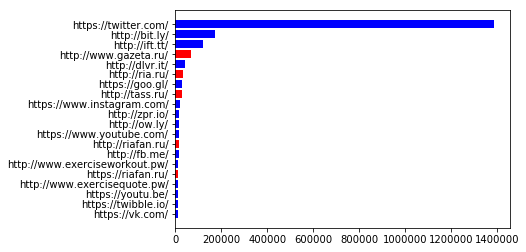

In [102]:
print_title("Top 20 Referenced Sites in Russian Tweets (Including Twitter)")
plt.barh(sorted(np.arange(len(top_site_numbers)), reverse = True), top_site_numbers, tick_label = top_site_domains, color = top_site_types)

Top 19 Referenced Sites in Russian Tweets (Ignoring Twitter)


<Container object of 19 artists>

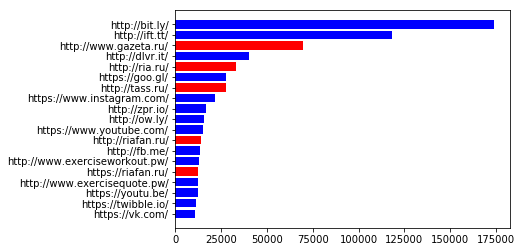

In [103]:
print_title("Top 19 Referenced Sites in Russian Tweets (Ignoring Twitter)")
plt.barh(sorted(np.arange(len(top_site_numbers[1:])), reverse = True), top_site_numbers[1:], tick_label = top_site_domains[1:], color = top_site_types[1:])

Top 20 Russian Sites in Russian Tweets


<Container object of 20 artists>

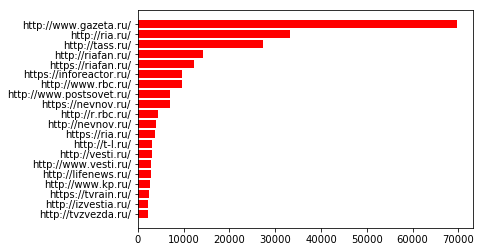

In [104]:
top_rus_domains = []
top_rus_numbers = []

for site in sorted_russian_sites[0:20]:
    info = domain_basics(site)
    top_rus_domains += [info[0]]
    top_rus_numbers += [info[1]]

print_title("Top 20 Russian Sites in Russian Tweets")
plt.barh(sorted(np.arange(len(top_rus_numbers)), reverse = True), top_rus_numbers, tick_label = top_rus_domains, color ='r')

Top 20 Non-Russian Sites in Russian Tweets (Not including Twitter)


<Container object of 20 artists>

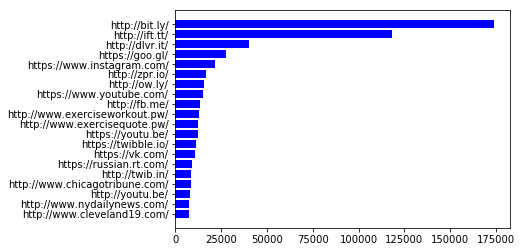

In [105]:
top_norus_domains = []
top_norus_numbers = []

for site in sorted_non_russian_sites[1:21]:
    info = domain_basics(site)
    top_norus_domains += [info[0]]
    top_norus_numbers += [info[1]]

print_title("Top 20 Non-Russian Sites in Russian Tweets (Not including Twitter)")
plt.barh(sorted(np.arange(len(top_norus_numbers)), reverse = True), top_norus_numbers, tick_label = top_norus_domains, color ='b')

In [106]:
t_russites = len(sorted_russian_sites)
t_norussites = len(sorted_non_russian_sites)
t_sites = len(sorted_domains)
total_tweets = len(data)

t_ruslinks = sum([deet[0] for (name, deet) in sorted_russian_sites])
t_noruslinks = sum([deet[0] for (name, deet) in sorted_non_russian_sites])

Number of Unique Domains
Russian: 1858
Non-Russian: 20584
for a total of 22442 unique domains for 2946207 tweets
percentage of unique Russian sites over all: 8.28%


<Container object of 3 artists>

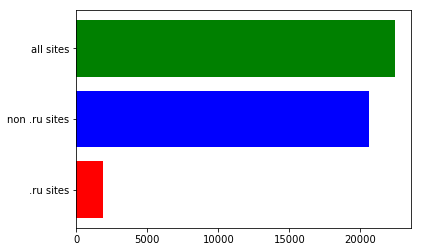

In [107]:
site_numbers = [t_sites, t_norussites,  t_russites]
site_labels = ['all sites', 'non .ru sites', '.ru sites']
site_colors = ['g', 'b', 'r']

print_title('Number of Unique Domains')

print('Russian: ' + str(t_russites))
print('Non-Russian: ' + str(t_norussites))
print('for a total of ' + str(t_sites) + ' unique domains for ' + str(total_tweets) + ' tweets')
print('percentage of unique Russian sites over all: ' + str(round(t_russites / t_sites * 100, 2)) + '%')
plt.barh(sorted(np.arange(len(site_numbers)), reverse = True), site_numbers, tick_label = site_labels, color = site_colors)

Number of Links to Domains
Russian: 261202
Non-Russian: 2565151
for a total of 2826353 links in 2946207 tweets
percentage of Russian links over all: 9.24%


<Container object of 3 artists>

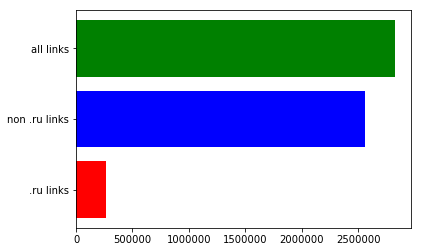

In [108]:
sitel_numbers = [total_links, t_noruslinks,  t_ruslinks]
sitel_labels = ['all links', 'non .ru links', '.ru links']
sitel_colors = ['g', 'b', 'r']

print_title('Number of Links to Domains')
print('Russian: ' + str(t_ruslinks))
print('Non-Russian: ' + str(t_noruslinks))
print('for a total of ' + str(total_links) + ' links in ' + str(total_tweets) + ' tweets')
print('percentage of Russian links over all: ' + str(round(t_ruslinks / total_links * 100, 2)) + '%')
plt.barh(sorted(np.arange(len(sitel_numbers)), reverse = True), sitel_numbers, tick_label = sitel_labels, color = sitel_colors)

# Some Preliminary Observations:
### Some automation websites
dlvr.it, twibble.io + twib.in, ift.tt (?)
### A lot of shortening websites
tinyurl, bit.ly, ow.ly, goo.gl, fb.me
### A few repeated websites w/ 'different' domains
youtu.be vs youtube.com, rbc.com
### Top sites are:
shortening websites, automation websites, social media, Fox news, USFreedomArmy; RUSSIATODAY (not included in Russian websites right now)
# NEXT question: matching with our categories?
## NOTE: this is all without having figured out all shortlink websites thus far; numbers will probably (?) go up afterwards. Also, haven't quite figured out what to do with the Twitter links.

In [109]:
def read_and_match_sites(types):
    # takes a list of category names
    sites = []
    for name in types:
        sites += [i.rstrip('\n') for i in open('categories/' + name).readlines()]
    matching = []
    for site in sites:
        if site in unique_domains.keys():
            matching += [(site, unique_domains[site][0])]
    return matching

def total_matches(matches):
    return sum([num for name, num in matches])

In [110]:
fake_matches = read_and_match_sites(['fake-news'])

Top 20 Matching Fake News Sites & Counts

Total Fake link matches: 6906 out of 2826353 total links
Percentage fake over all: 0.244 %


<Container object of 20 artists>

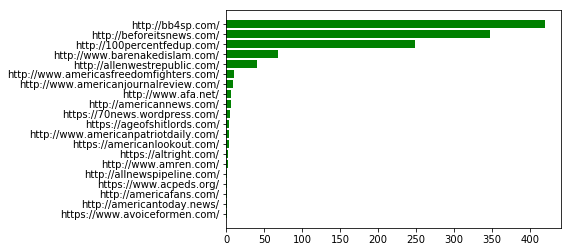

In [111]:
top_fake_domains = []
top_fake_numbers = []

for site in sorted(fake_matches[:20], key = operator.itemgetter(1), reverse=True):
    top_fake_domains += [site[0]]
    top_fake_numbers += [site[1]]

print_title('Top 20 Matching Fake News Sites & Counts')

print('\nTotal Fake link matches: ' + str(total_matches(fake_matches)) + ' out of ' + str(total_links) + ' total links')
print('Percentage fake over all: ' + str(round(total_matches(fake_matches) / total_links * 100, 3)) + ' %')

plt.barh(sorted(np.arange(len(top_fake_numbers)), reverse = True), top_fake_numbers, tick_label = top_fake_domains, color = 'g')

In [112]:
conspiracy_matches = read_and_match_sites(['conspiracy'])

Top 20 Matching Conspiracy Sites & Counts

Total Conspiracy link matches: 4116 out of 2826353 total_links
Percentage conspiracy over all: 0.146 %


<Container object of 20 artists>

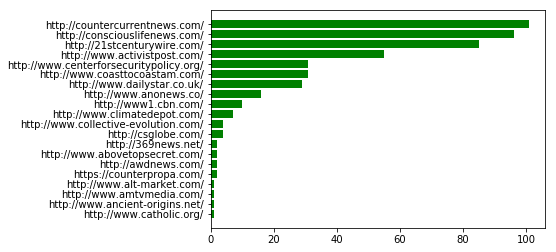

In [113]:
top_con_domains = []
top_con_numbers = []

for site in sorted(conspiracy_matches[:20], key = operator.itemgetter(1), reverse=True):
    top_con_domains += [site[0]]
    top_con_numbers += [site[1]]

print_title('Top 20 Matching Conspiracy Sites & Counts')
print('\nTotal Conspiracy link matches: ' + str(total_matches(conspiracy_matches)) + ' out of ' + str(total_links) + ' total_links')
print('Percentage conspiracy over all: ' + str(round(total_matches(conspiracy_matches) / total_links * 100, 3)) + ' %')
plt.barh(sorted(np.arange(len(top_con_numbers)), reverse = True), top_con_numbers, tick_label = top_con_domains, color = 'g')

In [114]:
all_matches = read_and_match_sites(['center', 'conspiracy', 'fake-news', 
                                           'left', 'left-center', 'pro-science',
                                          'right', 'right-center'])

Top 20 Matching MediaBiasFactCheck Sites & Counts

Total MBFC link matches: 126878 out of 2826353 total_links
Percentage MBFC over all: 4.489 %


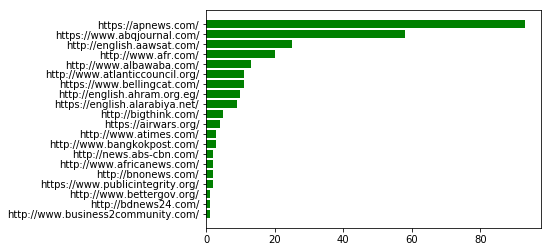

In [115]:
top_mbfc_domains = []
top_mbfc_numbers = []

for site in sorted(all_matches[:20], key = operator.itemgetter(1), reverse=True):
    top_mbfc_domains += [site[0]]
    top_mbfc_numbers += [site[1]]

plt.barh(sorted(np.arange(len(top_mbfc_numbers)), reverse = True), top_mbfc_numbers, tick_label = top_mbfc_domains, color = 'g')

print_title('Top 20 Matching MediaBiasFactCheck Sites & Counts')
print('\nTotal MBFC link matches: ' + str(total_matches(all_matches)) + ' out of ' + str(total_links) + ' total_links')
print('Percentage MBFC over all: ' + str(round(total_matches(all_matches) / total_links * 100, 3)) + ' %')

Total domains in Russian tweets: 22442
Total num of non .ru domains in Russian tweets: 20584
Total domains that don't match MBFC: 19567
Total domains that match MBFC: 1022 (why doesn't this add up? maybe an empty string?)


<Container object of 4 artists>

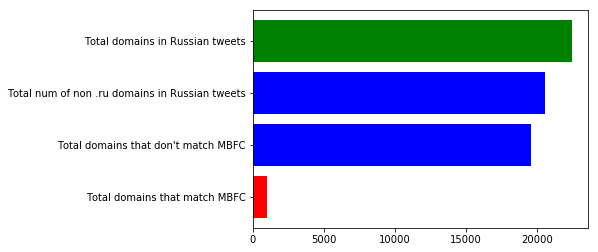

In [116]:
all_matches_domains = [name for name, numbers in all_matches]
non_matches = [name for name, info in sorted_non_russian_sites if name not in all_matches_domains]

dom_numbers = [len(sorted_domains), len(sorted_non_russian_sites), len(non_matches),  len(all_matches_domains)]
dom_labels = ['Total domains in Russian tweets', 'Total num of non .ru domains in Russian tweets',
              "Total domains that don't match MBFC", 'Total domains that match MBFC']
dom_colors = ['g', 'b', 'b', 'r']

print("Total domains in Russian tweets: " + str(dom_numbers[0]))
print('Total num of non .ru domains in Russian tweets: ' + str(dom_numbers[1]))
print("Total domains that don't match MBFC: " + str(dom_numbers[2]))
print("Total domains that match MBFC: " + str(str(dom_numbers[3])) + " (why doesn't this add up? maybe an empty string?)")
plt.barh(sorted(np.arange(len(dom_numbers)), reverse = True), dom_numbers, tick_label = dom_labels, color = dom_colors)

Strange that it doesn't add up exactly... Need to check that later. Maybe it's an empty string being read in. In the interim, let's see what the 'non-matches' are like.

In [25]:
print(random.sample(non_matches, 20))

['http://www.yourvoiceradio.com/', 'http://www.newschannel5.com/', 'https://www.rebelmouse.com/', 'http://pupj.co/', 'http://grrrgraphics.com/', 'https://doi.org/', 'http://thesource.com/', 'https://occuevolve.com/', 'http://m.vk.com/', 'http://sacb.ee/', 'http://ustre.am/', 'http://svpremesloop.com/', 'http://freethinker.co.uk/', 'http://thatgrapejuice.net/', 'http://herald.ca/', 'http://patriottribune.com/', 'https://www.unwatch.org/', 'http://www.nbcnewyork.com/', 'http://www.ign.com/', 'http://miniplanet.us/']


Looks like... some subdomains might be a problem, as we thought before. Also branches of some popular sites... though also, there seem to be some new interesting websites for us to consider?

# QUESTIONS FOR NEXT TIME:
## Initial Stats
1. How shall we deal with the twitter links?
2. Which are the most prominent url shortening domains? We should figure out how those redirect.
3. How to deal with "same domains" like youtube.com vs youtu.be?
4. What do our stats look like if we take out the influence of the unknowns (twitter links) and shortening links?
5. What are the sites that are NOT in our matching list??

## Network Work
1. Keep track of the individual accounts (can we?) and see who links what websites: if a user links to two different websites, we can add to the weight between those two websites.
2. Also consider the geo feature

## Miscellaneous
1. Saw some Italian/European websites in the mix? Might be interesting to see what's up with that.
2. Also, there's some interesting stuff about what languages each tweet is in; maybe we can see if there's explictly Russian tweets related to more of the Russian sites?
3. RussiaToday is totally a Russia-based site, but right now we're only using the '.ru' to check if it's a Russian site; do we need to do more work on that?